In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

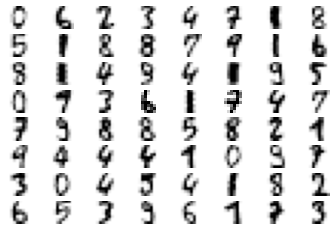

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

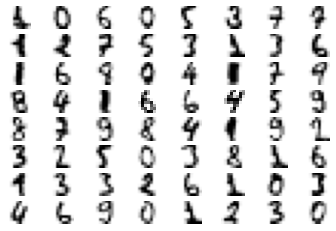

In [6]:
from random import randint
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(np.array(x_inputs[randint(0, samplesize)]).reshape(8,8), cmap='Greys')
plt.show()

In [7]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        outputs = []
        for xi in x_inputs:
            output = net.activate(xi)
            outputs.append(output)
        
        
        px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
        # the index of maximum in each line
        pred_outputs = np.argmax(px_outputs, axis = 1)
        # replace index to real number, from higher number to lower number!!
        for i in range(number_of_classification):
            index = number_of_classification - i - 1
            pred_outputs[pred_outputs==index] = numbers[index]
        
        real_outputs = np.array(x_outputs).reshape(samplesize,)
        
        acc = np.sum(pred_outputs == real_outputs)/samplesize

        genome.fitness = acc

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #checkpointer = neat.Checkpointer(100)
    #p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 3000)

    return [stats, winner]


samplesize = len(x_outputs)

local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist10")
[stats, winner] = run(config_path)

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


 ****** Running generation 0 ****** 

Population's average fitness: 0.09874 stdev: 0.03628
Best fitness: 0.20470 - size: (10, 64) - species 2 - id 150
Average adjusted fitness: 0.094
Mean genetic distance 2.803, standard deviation 0.294
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 35.477 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.11207 stdev: 0.03909
Best fitness: 0.26902 - size: (11, 64) - species 18 - id 219
Average adjusted fitness: 0.086
Mean genetic distance 2.874, standard deviation 0.345
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 45.833 sec (40.655 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.12000 stdev: 0.04261
Best fitness: 0.26902 - size: (11, 64) - species 18 - id 219
Average adjusted fitness: 0.100
Mean genetic distance 2.934, standard deviation 0.354
Population of 205 members in 44 species
Total extinctions: 0
Generation time: 40.730 sec 

Population's average fitness: 0.16164 stdev: 0.05465
Best fitness: 0.30489 - size: (14, 71) - species 43 - id 2492
Average adjusted fitness: 0.136
Mean genetic distance 3.189, standard deviation 0.435
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 45.561 sec (40.539 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.16639 stdev: 0.05540
Best fitness: 0.30489 - size: (14, 71) - species 43 - id 2492
Average adjusted fitness: 0.139
Mean genetic distance 3.180, standard deviation 0.439
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 46.883 sec (41.622 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.15760 stdev: 0.05974
Best fitness: 0.30489 - size: (14, 71) - species 43 - id 2492
Average adjusted fitness: 0.146
Mean genetic distance 3.184, standard deviation 0.440
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 47.698 sec (42.813 average)

Population's average fitness: 0.17428 stdev: 0.06168
Best fitness: 0.33643 - size: (13, 64) - species 24 - id 4997
Average adjusted fitness: 0.139
Mean genetic distance 3.128, standard deviation 0.551
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 54.899 sec (54.498 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.17872 stdev: 0.06111
Best fitness: 0.33643 - size: (13, 64) - species 24 - id 4997
Average adjusted fitness: 0.144
Mean genetic distance 3.114, standard deviation 0.540
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 53.374 sec (54.896 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.16718 stdev: 0.06032
Best fitness: 0.33643 - size: (13, 64) - species 24 - id 4997
Average adjusted fitness: 0.130
Mean genetic distance 3.123, standard deviation 0.546
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 56.707 sec (54.644 average)

Population's average fitness: 0.18083 stdev: 0.06526
Best fitness: 0.35931 - size: (15, 71) - species 40 - id 9414
Average adjusted fitness: 0.127
Mean genetic distance 3.077, standard deviation 0.607
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 57.293 sec (56.241 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.18296 stdev: 0.06542
Best fitness: 0.38590 - size: (16, 74) - species 40 - id 11233
Average adjusted fitness: 0.156
Mean genetic distance 3.066, standard deviation 0.601
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 55.983 sec (56.323 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.18412 stdev: 0.06302
Best fitness: 0.38590 - size: (16, 74) - species 40 - id 11233
Average adjusted fitness: 0.157
Mean genetic distance 3.055, standard deviation 0.589
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 56.751 sec (56.374 averag

Population's average fitness: 0.18547 stdev: 0.06732
Best fitness: 0.38590 - size: (16, 74) - species 40 - id 11233
Average adjusted fitness: 0.157
Mean genetic distance 3.148, standard deviation 0.619
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 51.633 sec (50.441 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.18793 stdev: 0.06483
Best fitness: 0.38590 - size: (16, 74) - species 40 - id 11233
Average adjusted fitness: 0.137
Mean genetic distance 3.143, standard deviation 0.634
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 50.341 sec (50.460 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.18520 stdev: 0.06361
Best fitness: 0.38590 - size: (16, 74) - species 40 - id 11233
Average adjusted fitness: 0.111
Mean genetic distance 3.138, standard deviation 0.639
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 50.139 sec (50.574 averag

Population's average fitness: 0.17063 stdev: 0.06385
Best fitness: 0.38590 - size: (16, 74) - species 40 - id 11233
Average adjusted fitness: 0.125
Mean genetic distance 2.851, standard deviation 0.614
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 65.145 sec (65.656 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.16555 stdev: 0.06666
Best fitness: 0.38590 - size: (16, 74) - species 40 - id 11233
Average adjusted fitness: 0.143
Mean genetic distance 2.839, standard deviation 0.596
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 65.245 sec (65.742 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.17682 stdev: 0.06658
Best fitness: 0.38590 - size: (16, 74) - species 40 - id 11233
Average adjusted fitness: 0.134
Mean genetic distance 2.850, standard deviation 0.592
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 65.582 sec (65.636 averag

Population's average fitness: 0.19806 stdev: 0.06807
Best fitness: 0.40383 - size: (24, 80) - species 73 - id 23869
Average adjusted fitness: 0.134
Mean genetic distance 2.972, standard deviation 0.541
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 67.259 sec (66.894 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.19728 stdev: 0.07109
Best fitness: 0.40383 - size: (24, 80) - species 81 - id 23869
Average adjusted fitness: 0.134
Mean genetic distance 3.015, standard deviation 0.560
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 66.956 sec (66.882 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.19808 stdev: 0.07349
Best fitness: 0.40631 - size: (25, 81) - species 81 - id 24238
Average adjusted fitness: 0.141
Mean genetic distance 2.980, standard deviation 0.557
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 69.403 sec (67.153 ave

Population's average fitness: 0.19856 stdev: 0.07215
Best fitness: 0.40631 - size: (25, 81) - species 81 - id 24238
Average adjusted fitness: 0.158
Mean genetic distance 2.956, standard deviation 0.561
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 65.062 sec (64.040 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.19242 stdev: 0.07570
Best fitness: 0.40631 - size: (25, 81) - species 81 - id 24238
Average adjusted fitness: 0.122
Mean genetic distance 2.971, standard deviation 0.555
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 66.786 sec (64.505 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.19501 stdev: 0.07523
Best fitness: 0.40631 - size: (25, 81) - species 81 - id 24238
Average adjusted fitness: 0.145
Mean genetic distance 2.977, standard deviation 0.565
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 65.256 sec (64.681 ave

Population's average fitness: 0.19345 stdev: 0.07327
Best fitness: 0.40631 - size: (25, 81) - species 84 - id 24238
Average adjusted fitness: 0.139
Mean genetic distance 3.083, standard deviation 0.654
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 70.538 sec (68.181 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.18584 stdev: 0.07460
Best fitness: 0.41929 - size: (24, 81) - species 81 - id 32602
Average adjusted fitness: 0.147
Mean genetic distance 3.066, standard deviation 0.654
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 69.103 sec (68.216 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.18910 stdev: 0.07668
Best fitness: 0.41929 - size: (24, 81) - species 81 - id 32602
Average adjusted fitness: 0.162
Mean genetic distance 3.070, standard deviation 0.635
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 70.665 sec (68.655 ave

Population's average fitness: 0.17863 stdev: 0.07545
Best fitness: 0.43043 - size: (25, 83) - species 81 - id 35282
Average adjusted fitness: 0.158
Mean genetic distance 3.050, standard deviation 0.596
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 76.382 sec (74.223 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.17843 stdev: 0.07354
Best fitness: 0.43043 - size: (25, 83) - species 81 - id 35282
Average adjusted fitness: 0.131
Mean genetic distance 3.048, standard deviation 0.604
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 75.656 sec (74.609 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.18223 stdev: 0.07481
Best fitness: 0.43043 - size: (25, 83) - species 81 - id 35282
Average adjusted fitness: 0.159
Mean genetic distance 3.059, standard deviation 0.596
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 74.709 sec (74.954 ave

Population's average fitness: 0.18425 stdev: 0.07897
Best fitness: 0.43043 - size: (25, 83) - species 81 - id 35282
Average adjusted fitness: 0.153
Mean genetic distance 2.953, standard deviation 0.546
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 77.472 sec (74.450 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.18355 stdev: 0.07461
Best fitness: 0.43043 - size: (25, 83) - species 81 - id 35282
Average adjusted fitness: 0.170
Mean genetic distance 2.943, standard deviation 0.569
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 75.716 sec (74.593 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.18918 stdev: 0.07736
Best fitness: 0.43043 - size: (25, 83) - species 81 - id 35282
Average adjusted fitness: 0.153
Mean genetic distance 2.947, standard deviation 0.572
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 77.275 sec (74.830 ave

Population's average fitness: 0.19377 stdev: 0.07764
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.125
Mean genetic distance 2.736, standard deviation 0.525
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 73.840 sec (75.908 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.19784 stdev: 0.08706
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.174
Mean genetic distance 2.734, standard deviation 0.531
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 73.543 sec (75.473 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.19818 stdev: 0.08075
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.147
Mean genetic distance 2.748, standard deviation 0.498
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 72.135 sec (75.149 ave

Population's average fitness: 0.18609 stdev: 0.08097
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.157
Mean genetic distance 2.728, standard deviation 0.570
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 71.056 sec (71.746 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.18138 stdev: 0.08259
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.175
Mean genetic distance 2.741, standard deviation 0.561
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 72.528 sec (71.756 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.18310 stdev: 0.07780
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.162
Mean genetic distance 2.753, standard deviation 0.596
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 70.887 sec (71.549 averag

Population's average fitness: 0.18267 stdev: 0.08184
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.138
Mean genetic distance 2.661, standard deviation 0.413
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 70.378 sec (63.189 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.18533 stdev: 0.07892
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.154
Mean genetic distance 2.670, standard deviation 0.410
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 70.786 sec (64.541 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.18767 stdev: 0.08208
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.180
Mean genetic distance 2.697, standard deviation 0.420
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 70.466 sec (65.834 ave

Population's average fitness: 0.19850 stdev: 0.08531
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.158
Mean genetic distance 2.641, standard deviation 0.436
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 71.676 sec (69.979 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.20437 stdev: 0.08384
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.171
Mean genetic distance 2.638, standard deviation 0.433
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 71.093 sec (70.191 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.20004 stdev: 0.08282
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.150
Mean genetic distance 2.641, standard deviation 0.425
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 69.640 sec (70.292 avera

Population's average fitness: 0.19312 stdev: 0.07746
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.189
Mean genetic distance 2.715, standard deviation 0.392
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 74.356 sec (71.900 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.18496 stdev: 0.07776
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.167
Mean genetic distance 2.701, standard deviation 0.423
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 74.530 sec (72.291 average)

 ****** Running generation 362 ****** 

Population's average fitness: 0.19072 stdev: 0.07790
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.162
Mean genetic distance 2.721, standard deviation 0.440
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 73.949 sec (72.744 ave

Population's average fitness: 0.20347 stdev: 0.08735
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.174
Mean genetic distance 2.804, standard deviation 0.467
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 78.532 sec (78.067 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.20656 stdev: 0.08369
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.148
Mean genetic distance 2.788, standard deviation 0.458
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 77.819 sec (78.360 average)

 ****** Running generation 386 ****** 

Population's average fitness: 0.20978 stdev: 0.08925
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.184
Mean genetic distance 2.775, standard deviation 0.482
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 77.644 sec (78.469 ave

Population's average fitness: 0.18673 stdev: 0.08049
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.152
Mean genetic distance 2.659, standard deviation 0.485
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 62.328 sec (72.650 average)

 ****** Running generation 409 ****** 

Population's average fitness: 0.18537 stdev: 0.07921
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.178
Mean genetic distance 2.697, standard deviation 0.487
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 61.069 sec (71.214 average)

 ****** Running generation 410 ****** 

Population's average fitness: 0.19009 stdev: 0.08180
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.175
Mean genetic distance 2.697, standard deviation 0.478
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 62.369 sec (70.031 averag

Population's average fitness: 0.19307 stdev: 0.09034
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.184
Mean genetic distance 2.709, standard deviation 0.470
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 73.235 sec (74.748 average)

 ****** Running generation 433 ****** 

Population's average fitness: 0.19965 stdev: 0.08550
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.186
Mean genetic distance 2.680, standard deviation 0.494
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 72.416 sec (74.631 average)

 ****** Running generation 434 ****** 

Population's average fitness: 0.20015 stdev: 0.08825
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.187
Mean genetic distance 2.705, standard deviation 0.474
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 72.558 sec (74.482 ave

Population's average fitness: 0.19869 stdev: 0.08439
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.191
Mean genetic distance 2.685, standard deviation 0.416
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 74.520 sec (71.772 average)

 ****** Running generation 457 ****** 

Population's average fitness: 0.20360 stdev: 0.08282
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.197
Mean genetic distance 2.700, standard deviation 0.403
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 74.007 sec (72.244 average)

 ****** Running generation 458 ****** 

Population's average fitness: 0.19881 stdev: 0.08461
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.146
Mean genetic distance 2.711, standard deviation 0.388
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 75.175 sec (72.965 ave

Population's average fitness: 0.21480 stdev: 0.08795
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.173
Mean genetic distance 2.659, standard deviation 0.400
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 80.052 sec (78.540 average)

 ****** Running generation 481 ****** 

Population's average fitness: 0.21136 stdev: 0.08530
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.147
Mean genetic distance 2.624, standard deviation 0.408
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 82.115 sec (78.988 average)

 ****** Running generation 482 ****** 

Population's average fitness: 0.21080 stdev: 0.08418
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.174
Mean genetic distance 2.619, standard deviation 0.425
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 80.622 sec (79.284 ave

Population's average fitness: 0.19165 stdev: 0.08015
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.154
Mean genetic distance 2.517, standard deviation 0.445
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 71.342 sec (74.030 average)

 ****** Running generation 505 ****** 

Population's average fitness: 0.18891 stdev: 0.07895
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.177
Mean genetic distance 2.515, standard deviation 0.441
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 72.702 sec (73.771 average)

 ****** Running generation 506 ****** 

Population's average fitness: 0.18555 stdev: 0.07783
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.128
Mean genetic distance 2.470, standard deviation 0.518
Population of 201 members in 3 species
Total extinctions: 0
Generation time: 70.468 sec (73.380 averag

Population's average fitness: 0.20362 stdev: 0.09078
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.171
Mean genetic distance 2.750, standard deviation 0.412
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 73.442 sec (71.507 average)

 ****** Running generation 529 ****** 

Population's average fitness: 0.19726 stdev: 0.08567
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.164
Mean genetic distance 2.761, standard deviation 0.424
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 76.549 sec (72.006 average)

 ****** Running generation 530 ****** 

Population's average fitness: 0.21036 stdev: 0.08506
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.178
Mean genetic distance 2.744, standard deviation 0.461
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 73.688 sec (72.398 ave

Population's average fitness: 0.20460 stdev: 0.08323
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.146
Mean genetic distance 2.641, standard deviation 0.482
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 58.574 sec (60.170 average)

 ****** Running generation 553 ****** 

Population's average fitness: 0.20182 stdev: 0.08366
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.172
Mean genetic distance 2.676, standard deviation 0.458
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 58.445 sec (59.904 average)

 ****** Running generation 554 ****** 

Population's average fitness: 0.18638 stdev: 0.08654
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.155
Mean genetic distance 2.569, standard deviation 0.454
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 68.166 sec (60.723 averag

Population's average fitness: 0.19138 stdev: 0.08588
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.162
Mean genetic distance 2.687, standard deviation 0.380
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 72.932 sec (73.794 average)

 ****** Running generation 577 ****** 

Population's average fitness: 0.19871 stdev: 0.08602
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.175
Mean genetic distance 2.671, standard deviation 0.383
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 74.208 sec (73.995 average)

 ****** Running generation 578 ****** 

Population's average fitness: 0.20263 stdev: 0.08986
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.141
Mean genetic distance 2.657, standard deviation 0.410
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 74.306 sec (74.248 ave

Population's average fitness: 0.18852 stdev: 0.08556
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.152
Mean genetic distance 2.652, standard deviation 0.414
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 76.295 sec (76.488 average)

 ****** Running generation 601 ****** 

Population's average fitness: 0.19657 stdev: 0.08405
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.165
Mean genetic distance 2.664, standard deviation 0.402
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 74.516 sec (76.429 average)

 ****** Running generation 602 ****** 

Population's average fitness: 0.18680 stdev: 0.08176
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.161
Mean genetic distance 2.690, standard deviation 0.402
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 77.905 sec (76.779 aver

Population's average fitness: 0.18698 stdev: 0.08475
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.144
Mean genetic distance 2.705, standard deviation 0.479
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 78.107 sec (77.785 average)

 ****** Running generation 625 ****** 

Population's average fitness: 0.18617 stdev: 0.08000
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.148
Mean genetic distance 2.728, standard deviation 0.459
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 78.551 sec (77.914 average)

 ****** Running generation 626 ****** 

Population's average fitness: 0.18926 stdev: 0.08388
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.161
Mean genetic distance 2.722, standard deviation 0.452
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 77.161 sec (77.839 averag

Population's average fitness: 0.18891 stdev: 0.08184
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.133
Mean genetic distance 2.695, standard deviation 0.483
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 73.438 sec (74.862 average)

 ****** Running generation 649 ****** 

Population's average fitness: 0.19044 stdev: 0.07992
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.140
Mean genetic distance 2.677, standard deviation 0.499
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 72.554 sec (74.540 average)

 ****** Running generation 650 ****** 

Population's average fitness: 0.18307 stdev: 0.08059
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.145
Mean genetic distance 2.673, standard deviation 0.502
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 76.295 sec (74.517 averag

Population's average fitness: 0.20647 stdev: 0.08372
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.149
Mean genetic distance 2.778, standard deviation 0.464
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 80.762 sec (78.406 average)

 ****** Running generation 673 ****** 

Population's average fitness: 0.20382 stdev: 0.08343
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.160
Mean genetic distance 2.807, standard deviation 0.470
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 79.001 sec (78.784 average)

 ****** Running generation 674 ****** 

Population's average fitness: 0.20232 stdev: 0.08564
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.183
Mean genetic distance 2.792, standard deviation 0.487
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 77.449 sec (78.812 ave

Population's average fitness: 0.21890 stdev: 0.08538
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.204
Mean genetic distance 2.807, standard deviation 0.494
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 78.936 sec (81.843 average)

 ****** Running generation 697 ****** 

Population's average fitness: 0.20795 stdev: 0.08716
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.171
Mean genetic distance 2.814, standard deviation 0.496
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 83.333 sec (82.199 average)

 ****** Running generation 698 ****** 

Population's average fitness: 0.20249 stdev: 0.08900
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.177
Mean genetic distance 2.810, standard deviation 0.512
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 80.653 sec (82.232 ave

Population's average fitness: 0.18221 stdev: 0.08277
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.163
Mean genetic distance 2.628, standard deviation 0.539
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 73.651 sec (76.565 average)

 ****** Running generation 721 ****** 

Population's average fitness: 0.18600 stdev: 0.08798
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.178
Mean genetic distance 2.624, standard deviation 0.535
Population of 198 members in 5 species
Total extinctions: 0
Generation time: 74.570 sec (76.236 average)

 ****** Running generation 722 ****** 

Population's average fitness: 0.18652 stdev: 0.08849
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.161
Mean genetic distance 2.632, standard deviation 0.520
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 73.956 sec (75.942 averag

Population's average fitness: 0.18873 stdev: 0.08855
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.157
Mean genetic distance 2.676, standard deviation 0.448
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 77.040 sec (75.685 average)

 ****** Running generation 745 ****** 

Population's average fitness: 0.19240 stdev: 0.08641
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.157
Mean genetic distance 2.665, standard deviation 0.460
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 77.317 sec (75.951 average)

 ****** Running generation 746 ****** 

Population's average fitness: 0.20620 stdev: 0.08984
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.156
Mean genetic distance 2.697, standard deviation 0.447
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 77.902 sec (76.146 ave

Population's average fitness: 0.20885 stdev: 0.08727
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.172
Mean genetic distance 2.727, standard deviation 0.503
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 77.303 sec (75.296 average)

 ****** Running generation 769 ****** 

Population's average fitness: 0.21979 stdev: 0.08282
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.174
Mean genetic distance 2.735, standard deviation 0.519
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 75.918 sec (75.222 average)

 ****** Running generation 770 ****** 

Population's average fitness: 0.20515 stdev: 0.08342
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.168
Mean genetic distance 2.725, standard deviation 0.511
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 76.070 sec (75.188 averag

Population's average fitness: 0.18953 stdev: 0.08752
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.139
Mean genetic distance 2.679, standard deviation 0.519
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 77.573 sec (76.891 average)

 ****** Running generation 793 ****** 

Population's average fitness: 0.19059 stdev: 0.08522
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.162
Mean genetic distance 2.661, standard deviation 0.506
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 74.827 sec (76.724 average)

 ****** Running generation 794 ****** 

Population's average fitness: 0.19925 stdev: 0.08348
Best fitness: 0.45826 - size: (25, 84) - species 81 - id 42607
Average adjusted fitness: 0.162
Mean genetic distance 2.662, standard deviation 0.510
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 76.356 sec (76.323 averag

Population's average fitness: 0.19092 stdev: 0.08525
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.169
Mean genetic distance 2.667, standard deviation 0.456
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 74.718 sec (74.870 average)

 ****** Running generation 817 ****** 

Population's average fitness: 0.19231 stdev: 0.08918
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.164
Mean genetic distance 2.627, standard deviation 0.429
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 74.389 sec (74.828 average)

 ****** Running generation 818 ****** 

Population's average fitness: 0.18891 stdev: 0.08465
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.159
Mean genetic distance 2.684, standard deviation 0.396
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 76.200 sec (75.068 ave

Population's average fitness: 0.20807 stdev: 0.08715
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.182
Mean genetic distance 2.715, standard deviation 0.457
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 77.663 sec (75.695 average)

 ****** Running generation 841 ****** 

Population's average fitness: 0.20041 stdev: 0.08565
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.160
Mean genetic distance 2.724, standard deviation 0.471
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 76.598 sec (75.677 average)

 ****** Running generation 842 ****** 

Population's average fitness: 0.19924 stdev: 0.08938
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.184
Mean genetic distance 2.683, standard deviation 0.491
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 76.691 sec (75.602 ave

Population's average fitness: 0.19428 stdev: 0.08166
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.155
Mean genetic distance 2.801, standard deviation 0.418
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 72.134 sec (73.337 average)

 ****** Running generation 865 ****** 

Population's average fitness: 0.19919 stdev: 0.08238
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.139
Mean genetic distance 2.811, standard deviation 0.411
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 72.902 sec (73.297 average)

 ****** Running generation 866 ****** 

Population's average fitness: 0.20523 stdev: 0.08031
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.153
Mean genetic distance 2.793, standard deviation 0.425
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 72.415 sec (73.064 

Mean genetic distance 2.826, standard deviation 0.491
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 70.357 sec (71.939 average)

 ****** Running generation 888 ****** 

Population's average fitness: 0.19077 stdev: 0.08282
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.164
Mean genetic distance 2.834, standard deviation 0.496
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 71.177 sec (71.913 average)

 ****** Running generation 889 ****** 

Population's average fitness: 0.19032 stdev: 0.08800
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.163
Mean genetic distance 2.851, standard deviation 0.473
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 71.499 sec (71.767 average)

 ****** Running generation 890 ****** 

Population's average fitness: 0.20100 stdev: 0.08324
Best fitness: 0.46135 - size: (25, 83) - speci

Population's average fitness: 0.19198 stdev: 0.09066
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.183
Mean genetic distance 2.737, standard deviation 0.545
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 68.520 sec (68.427 average)

 ****** Running generation 912 ****** 

Population's average fitness: 0.18747 stdev: 0.09115
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.166
Mean genetic distance 2.784, standard deviation 0.515
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 70.535 sec (68.622 average)

 ****** Running generation 913 ****** 

Population's average fitness: 0.18743 stdev: 0.08677
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.156
Mean genetic distance 2.761, standard deviation 0.519
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 68.715 sec (68.813 ave

Population's average fitness: 0.20412 stdev: 0.08793
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.165
Mean genetic distance 2.752, standard deviation 0.483
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 62.853 sec (64.073 average)

 ****** Running generation 936 ****** 

Population's average fitness: 0.19766 stdev: 0.08572
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.158
Mean genetic distance 2.723, standard deviation 0.500
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 63.344 sec (63.727 average)

 ****** Running generation 937 ****** 

Population's average fitness: 0.20167 stdev: 0.08656
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.169
Mean genetic distance 2.729, standard deviation 0.490
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 62.024 sec (63.422 ave

Population's average fitness: 0.20864 stdev: 0.07647
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.152
Mean genetic distance 2.804, standard deviation 0.486
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 67.880 sec (66.864 average)

 ****** Running generation 960 ****** 

Population's average fitness: 0.19713 stdev: 0.08252
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.154
Mean genetic distance 2.784, standard deviation 0.496
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 67.864 sec (66.901 average)

 ****** Running generation 961 ****** 

Population's average fitness: 0.20109 stdev: 0.08805
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.175
Mean genetic distance 2.802, standard deviation 0.495
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 67.728 sec (67.016 

Mean genetic distance 2.863, standard deviation 0.494
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 74.220 sec (70.929 average)

 ****** Running generation 983 ****** 

Population's average fitness: 0.20183 stdev: 0.08358
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.166
Mean genetic distance 2.866, standard deviation 0.468
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 73.897 sec (71.524 average)

 ****** Running generation 984 ****** 

Population's average fitness: 0.20703 stdev: 0.08404
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.177
Mean genetic distance 2.865, standard deviation 0.472
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 73.534 sec (71.966 average)

 ****** Running generation 985 ****** 

Population's average fitness: 0.20286 stdev: 0.08383
Best fitness: 0.46135 - size: (25, 83) - speci

Population's average fitness: 0.20100 stdev: 0.08455
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.182
Mean genetic distance 2.872, standard deviation 0.543
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 75.549 sec (75.325 average)

 ****** Running generation 1007 ****** 

Population's average fitness: 0.19524 stdev: 0.08377
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.183
Mean genetic distance 2.865, standard deviation 0.494
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 75.261 sec (75.612 average)

 ****** Running generation 1008 ****** 

Population's average fitness: 0.18883 stdev: 0.08610
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.170
Mean genetic distance 2.861, standard deviation 0.486
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 75.946 sec (75.75

Mean genetic distance 2.711, standard deviation 0.467
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 76.352 sec (74.534 average)

 ****** Running generation 1030 ****** 

Population's average fitness: 0.18978 stdev: 0.07700
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.127
Mean genetic distance 2.712, standard deviation 0.481
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 76.602 sec (74.662 average)

 ****** Running generation 1031 ****** 

Population's average fitness: 0.18772 stdev: 0.08567
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.176
Mean genetic distance 2.743, standard deviation 0.459
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 77.472 sec (74.930 average)

 ****** Running generation 1032 ****** 

Population's average fitness: 0.18266 stdev: 0.08389
Best fitness: 0.46135 - size: (25, 83) - spec

Population's average fitness: 0.21130 stdev: 0.08479
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.163
Mean genetic distance 2.768, standard deviation 0.442
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 73.277 sec (73.088 average)

 ****** Running generation 1054 ****** 

Population's average fitness: 0.20504 stdev: 0.08860
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.182
Mean genetic distance 2.788, standard deviation 0.441
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 74.705 sec (73.094 average)

 ****** Running generation 1055 ****** 

Population's average fitness: 0.20201 stdev: 0.09109
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.169
Mean genetic distance 2.777, standard deviation 0.464
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 73.633 sec (73.17

Mean genetic distance 2.743, standard deviation 0.474
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 73.383 sec (73.602 average)

 ****** Running generation 1077 ****** 

Population's average fitness: 0.20292 stdev: 0.08652
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.161
Mean genetic distance 2.772, standard deviation 0.508
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 72.878 sec (73.349 average)

 ****** Running generation 1078 ****** 

Population's average fitness: 0.20896 stdev: 0.08798
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.172
Mean genetic distance 2.778, standard deviation 0.506
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 71.674 sec (73.125 average)

 ****** Running generation 1079 ****** 

Population's average fitness: 0.20697 stdev: 0.08925
Best fitness: 0.46135 - size: (25, 83) - speci

Population's average fitness: 0.19008 stdev: 0.08502
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.145
Mean genetic distance 2.594, standard deviation 0.427
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 74.493 sec (72.842 average)

 ****** Running generation 1101 ****** 

Population's average fitness: 0.19142 stdev: 0.08184
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.143
Mean genetic distance 2.624, standard deviation 0.447
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 71.466 sec (72.823 average)

 ****** Running generation 1102 ****** 

Population's average fitness: 0.18709 stdev: 0.08347
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.164
Mean genetic distance 2.632, standard deviation 0.420
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 74.472 sec (73.053 a

Mean genetic distance 2.724, standard deviation 0.440
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 66.108 sec (73.371 average)

 ****** Running generation 1124 ****** 

Population's average fitness: 0.20120 stdev: 0.08928
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.161
Mean genetic distance 2.696, standard deviation 0.430
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 68.548 sec (72.485 average)

 ****** Running generation 1125 ****** 

Population's average fitness: 0.20444 stdev: 0.08015
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.173
Mean genetic distance 2.665, standard deviation 0.457
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 64.593 sec (71.106 average)

 ****** Running generation 1126 ****** 

Population's average fitness: 0.19687 stdev: 0.08055
Best fitness: 0.46135 - size: (25, 83) - spec

Population's average fitness: 0.20476 stdev: 0.08166
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.173
Mean genetic distance 2.704, standard deviation 0.471
Population of 196 members in 10 species
Total extinctions: 0
Generation time: 70.058 sec (70.328 average)

 ****** Running generation 1148 ****** 

Population's average fitness: 0.20720 stdev: 0.08796
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.198
Mean genetic distance 2.716, standard deviation 0.447
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 68.688 sec (70.280 average)

 ****** Running generation 1149 ****** 

Population's average fitness: 0.20018 stdev: 0.08633
Best fitness: 0.46135 - size: (25, 83) - species 81 - id 144150
Average adjusted fitness: 0.149
Mean genetic distance 2.744, standard deviation 0.451
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 71.252 sec (70.47

Mean genetic distance 2.741, standard deviation 0.473
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 61.618 sec (60.241 average)

 ****** Running generation 1171 ****** 

Population's average fitness: 0.20553 stdev: 0.08117
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.133
Mean genetic distance 2.759, standard deviation 0.467
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 64.368 sec (59.659 average)

 ****** Running generation 1172 ****** 

Population's average fitness: 0.20449 stdev: 0.08694
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.160
Mean genetic distance 2.779, standard deviation 0.450
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 60.278 sec (59.816 average)

 ****** Running generation 1173 ****** 

Population's average fitness: 0.20534 stdev: 0.08843
Best fitness: 0.46815 - size: (26, 83) - spe

Population's average fitness: 0.20454 stdev: 0.08656
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.159
Mean genetic distance 2.676, standard deviation 0.509
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 70.020 sec (72.744 average)

 ****** Running generation 1195 ****** 

Population's average fitness: 0.20230 stdev: 0.08804
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.186
Mean genetic distance 2.636, standard deviation 0.523
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 73.735 sec (72.731 average)

 ****** Running generation 1196 ****** 

Population's average fitness: 0.20633 stdev: 0.08555
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.156
Mean genetic distance 2.644, standard deviation 0.498
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 70.922 sec (72.512 a

Mean genetic distance 2.675, standard deviation 0.382
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 67.475 sec (66.194 average)

 ****** Running generation 1218 ****** 

Population's average fitness: 0.19637 stdev: 0.07868
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.177
Mean genetic distance 2.680, standard deviation 0.386
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 68.703 sec (66.398 average)

 ****** Running generation 1219 ****** 

Population's average fitness: 0.19613 stdev: 0.08239
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.182
Mean genetic distance 2.686, standard deviation 0.390
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 68.410 sec (66.594 average)

 ****** Running generation 1220 ****** 

Population's average fitness: 0.20652 stdev: 0.08600
Best fitness: 0.46815 - size: (26, 83) - sp

Population's average fitness: 0.21531 stdev: 0.08634
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.169
Mean genetic distance 2.737, standard deviation 0.470
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 71.931 sec (69.567 average)

 ****** Running generation 1242 ****** 

Population's average fitness: 0.20821 stdev: 0.08613
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.178
Mean genetic distance 2.713, standard deviation 0.465
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 66.407 sec (69.244 average)

 ****** Running generation 1243 ****** 

Population's average fitness: 0.21856 stdev: 0.08247
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.191
Mean genetic distance 2.681, standard deviation 0.480
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 70.864 sec (69.54

Mean genetic distance 2.561, standard deviation 0.476
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 70.452 sec (72.830 average)

 ****** Running generation 1265 ****** 

Population's average fitness: 0.20227 stdev: 0.09145
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.173
Mean genetic distance 2.392, standard deviation 0.444
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 72.384 sec (73.069 average)

 ****** Running generation 1266 ****** 

Population's average fitness: 0.19044 stdev: 0.08707
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.165
Mean genetic distance 2.415, standard deviation 0.402
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 71.664 sec (72.800 average)

 ****** Running generation 1267 ****** 

Population's average fitness: 0.19435 stdev: 0.08676
Best fitness: 0.46815 - size: (26, 83) - speci

Population's average fitness: 0.18530 stdev: 0.08909
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.168
Mean genetic distance 2.682, standard deviation 0.434
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 65.945 sec (68.848 average)

 ****** Running generation 1289 ****** 

Population's average fitness: 0.19003 stdev: 0.08601
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.159
Mean genetic distance 2.713, standard deviation 0.411
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 68.156 sec (68.955 average)

 ****** Running generation 1290 ****** 

Population's average fitness: 0.19216 stdev: 0.08395
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.174
Mean genetic distance 2.723, standard deviation 0.416
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 67.741 sec (68.94

Mean genetic distance 2.650, standard deviation 0.485
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 73.623 sec (72.249 average)

 ****** Running generation 1312 ****** 

Population's average fitness: 0.20163 stdev: 0.09096
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.145
Mean genetic distance 2.664, standard deviation 0.472
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 69.867 sec (72.030 average)

 ****** Running generation 1313 ****** 

Population's average fitness: 0.19619 stdev: 0.08721
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.167
Mean genetic distance 2.642, standard deviation 0.458
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 72.818 sec (72.156 average)

 ****** Running generation 1314 ****** 

Population's average fitness: 0.19485 stdev: 0.08365
Best fitness: 0.46815 - size: (26, 83) - speci

Population's average fitness: 0.18887 stdev: 0.08819
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.176
Mean genetic distance 2.643, standard deviation 0.403
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 63.105 sec (67.087 average)

 ****** Running generation 1336 ****** 

Population's average fitness: 0.19325 stdev: 0.08288
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.147
Mean genetic distance 2.680, standard deviation 0.411
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 63.392 sec (66.321 average)

 ****** Running generation 1337 ****** 

Population's average fitness: 0.20007 stdev: 0.08688
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.135
Mean genetic distance 2.719, standard deviation 0.427
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 63.105 sec (65.382

Mean genetic distance 2.801, standard deviation 0.500
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 78.140 sec (77.178 average)

 ****** Running generation 1359 ****** 

Population's average fitness: 0.20864 stdev: 0.08611
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.150
Mean genetic distance 2.773, standard deviation 0.533
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 80.047 sec (77.390 average)

 ****** Running generation 1360 ****** 

Population's average fitness: 0.20502 stdev: 0.08493
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.191
Mean genetic distance 2.750, standard deviation 0.507
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 77.814 sec (77.435 average)

 ****** Running generation 1361 ****** 

Population's average fitness: 0.19575 stdev: 0.08313
Best fitness: 0.46815 - size: (26, 83) - sp

Population's average fitness: 0.18374 stdev: 0.07961
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.153
Mean genetic distance 2.718, standard deviation 0.469
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 75.097 sec (64.300 average)

 ****** Running generation 1383 ****** 

Population's average fitness: 0.18292 stdev: 0.08236
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.152
Mean genetic distance 2.715, standard deviation 0.460
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 74.591 sec (65.552 average)

 ****** Running generation 1384 ****** 

Population's average fitness: 0.18627 stdev: 0.08470
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.141
Mean genetic distance 2.700, standard deviation 0.484
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 74.004 sec (66.630 a

Mean genetic distance 2.724, standard deviation 0.519
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 77.914 sec (78.126 average)

 ****** Running generation 1406 ****** 

Population's average fitness: 0.20990 stdev: 0.09055
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.179
Mean genetic distance 2.733, standard deviation 0.507
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 77.015 sec (78.310 average)

 ****** Running generation 1407 ****** 

Population's average fitness: 0.20909 stdev: 0.08756
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.190
Mean genetic distance 2.749, standard deviation 0.498
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 77.209 sec (78.353 average)

 ****** Running generation 1408 ****** 

Population's average fitness: 0.20442 stdev: 0.08983
Best fitness: 0.46815 - size: (26, 83) - sp

Population's average fitness: 0.20181 stdev: 0.08641
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.173
Mean genetic distance 2.531, standard deviation 0.456
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 75.879 sec (77.596 average)

 ****** Running generation 1430 ****** 

Population's average fitness: 0.19544 stdev: 0.08643
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.146
Mean genetic distance 2.522, standard deviation 0.463
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 77.478 sec (77.593 average)

 ****** Running generation 1431 ****** 

Population's average fitness: 0.20764 stdev: 0.08422
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.183
Mean genetic distance 2.535, standard deviation 0.459
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 79.472 sec (77.773 a

Mean genetic distance 2.530, standard deviation 0.427
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 78.197 sec (76.897 average)

 ****** Running generation 1453 ****** 

Population's average fitness: 0.19070 stdev: 0.08518
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.137
Mean genetic distance 2.424, standard deviation 0.352
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 77.360 sec (77.069 average)

 ****** Running generation 1454 ****** 

Population's average fitness: 0.19376 stdev: 0.08553
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.182
Mean genetic distance 2.438, standard deviation 0.350
Population of 198 members in 6 species
Total extinctions: 0
Generation time: 78.229 sec (77.273 average)

 ****** Running generation 1455 ****** 

Population's average fitness: 0.19530 stdev: 0.08497
Best fitness: 0.46815 - size: (26, 83) - speci

Population's average fitness: 0.18880 stdev: 0.08415
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.169
Mean genetic distance 2.568, standard deviation 0.371
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 80.375 sec (80.087 average)

 ****** Running generation 1477 ****** 

Population's average fitness: 0.19015 stdev: 0.08324
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.145
Mean genetic distance 2.592, standard deviation 0.352
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 82.367 sec (80.362 average)

 ****** Running generation 1478 ****** 

Population's average fitness: 0.18754 stdev: 0.08675
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.180
Mean genetic distance 2.564, standard deviation 0.341
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 79.531 sec (80.119 

Mean genetic distance 2.663, standard deviation 0.403
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 71.269 sec (72.784 average)

 ****** Running generation 1500 ****** 

Population's average fitness: 0.20780 stdev: 0.09082
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.168
Mean genetic distance 2.665, standard deviation 0.397
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 73.214 sec (72.724 average)

 ****** Running generation 1501 ****** 

Population's average fitness: 0.20577 stdev: 0.09244
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.160
Mean genetic distance 2.674, standard deviation 0.402
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 75.585 sec (72.887 average)

 ****** Running generation 1502 ****** 

Population's average fitness: 0.20382 stdev: 0.08969
Best fitness: 0.46815 - size: (26, 83) - sp

Population's average fitness: 0.21408 stdev: 0.08921
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.176
Mean genetic distance 2.543, standard deviation 0.433
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 61.447 sec (66.831 average)

 ****** Running generation 1524 ****** 

Population's average fitness: 0.20074 stdev: 0.08940
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.168
Mean genetic distance 2.530, standard deviation 0.440
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 62.153 sec (65.521 average)

 ****** Running generation 1525 ****** 

Population's average fitness: 0.20751 stdev: 0.09003
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.195
Mean genetic distance 2.516, standard deviation 0.443
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 62.443 sec (64.348 a

Mean genetic distance 2.762, standard deviation 0.455
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 68.187 sec (69.119 average)

 ****** Running generation 1547 ****** 

Population's average fitness: 0.19987 stdev: 0.08974
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.168
Mean genetic distance 2.740, standard deviation 0.460
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 69.283 sec (69.156 average)

 ****** Running generation 1548 ****** 

Population's average fitness: 0.20109 stdev: 0.08751
Best fitness: 0.46815 - size: (26, 83) - species 81 - id 209993
Average adjusted fitness: 0.147
Mean genetic distance 2.747, standard deviation 0.448
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 70.034 sec (69.142 average)

 ****** Running generation 1549 ****** 

Population's average fitness: 0.19864 stdev: 0.08936
Best fitness: 0.46815 - size: (26, 83) - sp

Population's average fitness: 0.20629 stdev: 0.09116
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.147
Mean genetic distance 2.809, standard deviation 0.470
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 73.065 sec (72.076 average)

 ****** Running generation 1571 ****** 

Population's average fitness: 0.21193 stdev: 0.09263
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.180
Mean genetic distance 2.801, standard deviation 0.485
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 72.056 sec (72.296 average)

 ****** Running generation 1572 ****** 

Population's average fitness: 0.21259 stdev: 0.09149
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.200
Mean genetic distance 2.787, standard deviation 0.497
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 71.908 sec (72.10

Mean genetic distance 2.610, standard deviation 0.462
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 71.844 sec (73.658 average)

 ****** Running generation 1594 ****** 

Population's average fitness: 0.20078 stdev: 0.08359
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.168
Mean genetic distance 2.596, standard deviation 0.429
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 71.661 sec (73.680 average)

 ****** Running generation 1595 ****** 

Population's average fitness: 0.20626 stdev: 0.08713
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.173
Mean genetic distance 2.585, standard deviation 0.443
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 76.518 sec (73.701 average)

 ****** Running generation 1596 ****** 

Population's average fitness: 0.20170 stdev: 0.08308
Best fitness: 0.46815 - size: (27, 85) - speci

Population's average fitness: 0.20716 stdev: 0.08307
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.163
Mean genetic distance 2.602, standard deviation 0.405
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 69.982 sec (71.328 average)

 ****** Running generation 1618 ****** 

Population's average fitness: 0.20073 stdev: 0.08713
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.165
Mean genetic distance 2.588, standard deviation 0.384
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 70.790 sec (71.356 average)

 ****** Running generation 1619 ****** 

Population's average fitness: 0.20547 stdev: 0.08268
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.154
Mean genetic distance 2.600, standard deviation 0.381
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 71.470 sec (71.470

Mean genetic distance 2.552, standard deviation 0.411
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 70.797 sec (70.241 average)

 ****** Running generation 1641 ****** 

Population's average fitness: 0.20438 stdev: 0.08590
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.175
Mean genetic distance 2.545, standard deviation 0.382
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 68.781 sec (69.998 average)

 ****** Running generation 1642 ****** 

Population's average fitness: 0.20109 stdev: 0.08843
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.175
Mean genetic distance 2.541, standard deviation 0.397
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 69.378 sec (69.717 average)

 ****** Running generation 1643 ****** 

Population's average fitness: 0.20038 stdev: 0.09213
Best fitness: 0.46815 - size: (27, 85) - speci

Population's average fitness: 0.19015 stdev: 0.08506
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.133
Mean genetic distance 2.714, standard deviation 0.455
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 67.657 sec (68.451 average)

 ****** Running generation 1665 ****** 

Population's average fitness: 0.19406 stdev: 0.08598
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.169
Mean genetic distance 2.721, standard deviation 0.455
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 67.635 sec (68.512 average)

 ****** Running generation 1666 ****** 

Population's average fitness: 0.20499 stdev: 0.08628
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.185
Mean genetic distance 2.732, standard deviation 0.435
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 69.472 sec (68.63

Mean genetic distance 2.672, standard deviation 0.430
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 58.206 sec (58.322 average)

 ****** Running generation 1688 ****** 

Population's average fitness: 0.18767 stdev: 0.07823
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.131
Mean genetic distance 2.642, standard deviation 0.467
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 67.370 sec (59.067 average)

 ****** Running generation 1689 ****** 

Population's average fitness: 0.18799 stdev: 0.08168
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.147
Mean genetic distance 2.661, standard deviation 0.457
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 67.661 sec (59.902 average)

 ****** Running generation 1690 ****** 

Population's average fitness: 0.19549 stdev: 0.08706
Best fitness: 0.46815 - size: (27, 85) - speci

Population's average fitness: 0.19911 stdev: 0.08273
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.152
Mean genetic distance 2.733, standard deviation 0.423
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 75.031 sec (73.987 average)

 ****** Running generation 1712 ****** 

Population's average fitness: 0.19360 stdev: 0.07975
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.138
Mean genetic distance 2.732, standard deviation 0.424
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 76.504 sec (74.273 average)

 ****** Running generation 1713 ****** 

Population's average fitness: 0.18646 stdev: 0.08371
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.166
Mean genetic distance 2.661, standard deviation 0.459
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 73.828 sec (74.29

Mean genetic distance 2.658, standard deviation 0.399
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 80.936 sec (78.958 average)

 ****** Running generation 1735 ****** 

Population's average fitness: 0.20248 stdev: 0.08761
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.176
Mean genetic distance 2.654, standard deviation 0.425
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 78.038 sec (79.092 average)

 ****** Running generation 1736 ****** 

Population's average fitness: 0.20432 stdev: 0.08683
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.185
Mean genetic distance 2.651, standard deviation 0.410
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 76.440 sec (79.207 average)

 ****** Running generation 1737 ****** 

Population's average fitness: 0.20036 stdev: 0.08745
Best fitness: 0.46815 - size: (27, 85) - sp

Population's average fitness: 0.20129 stdev: 0.08549
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.188
Mean genetic distance 2.665, standard deviation 0.467
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 73.757 sec (75.861 average)

 ****** Running generation 1759 ****** 

Population's average fitness: 0.20366 stdev: 0.08676
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.189
Mean genetic distance 2.667, standard deviation 0.458
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 74.902 sec (75.847 average)

 ****** Running generation 1760 ****** 

Population's average fitness: 0.20855 stdev: 0.08248
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.175
Mean genetic distance 2.681, standard deviation 0.449
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 74.843 sec (75.851 a

Mean genetic distance 2.672, standard deviation 0.438
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 68.709 sec (71.529 average)

 ****** Running generation 1782 ****** 

Population's average fitness: 0.19296 stdev: 0.08356
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.138
Mean genetic distance 2.720, standard deviation 0.438
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 70.146 sec (70.876 average)

 ****** Running generation 1783 ****** 

Population's average fitness: 0.19202 stdev: 0.08536
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.160
Mean genetic distance 2.727, standard deviation 0.474
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 68.875 sec (69.969 average)

 ****** Running generation 1784 ****** 

Population's average fitness: 0.19354 stdev: 0.08806
Best fitness: 0.46815 - size: (27, 85) - speci

Population's average fitness: 0.20352 stdev: 0.08915
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.166
Mean genetic distance 2.767, standard deviation 0.461
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 72.566 sec (71.766 average)

 ****** Running generation 1806 ****** 

Population's average fitness: 0.20713 stdev: 0.08903
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.185
Mean genetic distance 2.773, standard deviation 0.451
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 71.888 sec (71.532 average)

 ****** Running generation 1807 ****** 

Population's average fitness: 0.20464 stdev: 0.08557
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.181
Mean genetic distance 2.802, standard deviation 0.426
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 70.859 sec (71.56

Mean genetic distance 2.654, standard deviation 0.464
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 60.203 sec (60.682 average)

 ****** Running generation 1829 ****** 

Population's average fitness: 0.18888 stdev: 0.08546
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.176
Mean genetic distance 2.669, standard deviation 0.459
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 68.184 sec (61.586 average)

 ****** Running generation 1830 ****** 

Population's average fitness: 0.19324 stdev: 0.08823
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.156
Mean genetic distance 2.632, standard deviation 0.475
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 70.606 sec (62.569 average)

 ****** Running generation 1831 ****** 

Population's average fitness: 0.19206 stdev: 0.08496
Best fitness: 0.46815 - size: (27, 85) - speci

Population's average fitness: 0.19760 stdev: 0.08044
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.194
Mean genetic distance 2.655, standard deviation 0.384
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 73.929 sec (72.023 average)

 ****** Running generation 1853 ****** 

Population's average fitness: 0.19134 stdev: 0.08315
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.168
Mean genetic distance 2.677, standard deviation 0.390
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 72.761 sec (72.082 average)

 ****** Running generation 1854 ****** 

Population's average fitness: 0.19458 stdev: 0.08097
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.149
Mean genetic distance 2.674, standard deviation 0.398
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 73.214 sec (72.30

Mean genetic distance 2.675, standard deviation 0.421
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 76.976 sec (75.549 average)

 ****** Running generation 1876 ****** 

Population's average fitness: 0.20515 stdev: 0.08384
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.150
Mean genetic distance 2.654, standard deviation 0.450
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 75.606 sec (75.670 average)

 ****** Running generation 1877 ****** 

Population's average fitness: 0.20839 stdev: 0.07842
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.196
Mean genetic distance 2.652, standard deviation 0.433
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 75.066 sec (75.850 average)

 ****** Running generation 1878 ****** 

Population's average fitness: 0.20011 stdev: 0.08201
Best fitness: 0.46815 - size: (27, 85) - spe

Population's average fitness: 0.19669 stdev: 0.08356
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.182
Mean genetic distance 2.614, standard deviation 0.430
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 73.055 sec (71.975 average)

 ****** Running generation 1900 ****** 

Population's average fitness: 0.19191 stdev: 0.08103
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.161
Mean genetic distance 2.647, standard deviation 0.423
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 72.714 sec (71.851 average)

 ****** Running generation 1901 ****** 

Population's average fitness: 0.18262 stdev: 0.07974
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.157
Mean genetic distance 2.648, standard deviation 0.414
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 73.016 sec (72.058 a

Mean genetic distance 2.609, standard deviation 0.415
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 67.108 sec (69.653 average)

 ****** Running generation 1923 ****** 

Population's average fitness: 0.20118 stdev: 0.08855
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.164
Mean genetic distance 2.612, standard deviation 0.428
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 68.109 sec (69.152 average)

 ****** Running generation 1924 ****** 

Population's average fitness: 0.20332 stdev: 0.08112
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.176
Mean genetic distance 2.626, standard deviation 0.403
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 67.312 sec (68.981 average)

 ****** Running generation 1925 ****** 

Population's average fitness: 0.19463 stdev: 0.08348
Best fitness: 0.46815 - size: (27, 85) - speci

Population's average fitness: 0.20114 stdev: 0.08875
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.162
Mean genetic distance 2.562, standard deviation 0.454
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 70.544 sec (68.466 average)

 ****** Running generation 1947 ****** 

Population's average fitness: 0.19931 stdev: 0.08608
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.188
Mean genetic distance 2.577, standard deviation 0.458
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 70.637 sec (68.767 average)

 ****** Running generation 1948 ****** 

Population's average fitness: 0.20156 stdev: 0.08784
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.191
Mean genetic distance 2.568, standard deviation 0.478
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 69.730 sec (69.156 a

Mean genetic distance 2.740, standard deviation 0.439
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 66.082 sec (68.606 average)

 ****** Running generation 1970 ****** 

Population's average fitness: 0.19894 stdev: 0.09008
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.154
Mean genetic distance 2.806, standard deviation 0.439
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 67.422 sec (68.575 average)

 ****** Running generation 1971 ****** 

Population's average fitness: 0.18915 stdev: 0.08759
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.177
Mean genetic distance 2.786, standard deviation 0.421
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 68.163 sec (68.637 average)

 ****** Running generation 1972 ****** 

Population's average fitness: 0.19355 stdev: 0.08693
Best fitness: 0.46815 - size: (27, 85) - sp

Population's average fitness: 0.19401 stdev: 0.08694
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.183
Mean genetic distance 2.807, standard deviation 0.479
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 73.485 sec (71.721 average)

 ****** Running generation 1994 ****** 

Population's average fitness: 0.20469 stdev: 0.08258
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.154
Mean genetic distance 2.825, standard deviation 0.475
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 73.557 sec (72.073 average)

 ****** Running generation 1995 ****** 

Population's average fitness: 0.20969 stdev: 0.08523
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.188
Mean genetic distance 2.809, standard deviation 0.469
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 70.415 sec (72.02

Mean genetic distance 2.792, standard deviation 0.491
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 68.058 sec (71.133 average)

 ****** Running generation 2017 ****** 

Population's average fitness: 0.19983 stdev: 0.09031
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.171
Mean genetic distance 2.790, standard deviation 0.497
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 73.759 sec (71.306 average)

 ****** Running generation 2018 ****** 

Population's average fitness: 0.20988 stdev: 0.08568
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.146
Mean genetic distance 2.790, standard deviation 0.487
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 67.829 sec (70.767 average)

 ****** Running generation 2019 ****** 

Population's average fitness: 0.20625 stdev: 0.08594
Best fitness: 0.46815 - size: (27, 85) - sp

Population's average fitness: 0.20422 stdev: 0.08535
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.143
Mean genetic distance 2.647, standard deviation 0.428
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 69.247 sec (70.180 average)

 ****** Running generation 2041 ****** 

Population's average fitness: 0.20064 stdev: 0.08587
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.173
Mean genetic distance 2.626, standard deviation 0.424
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 70.469 sec (70.287 average)

 ****** Running generation 2042 ****** 

Population's average fitness: 0.19342 stdev: 0.08499
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.177
Mean genetic distance 2.632, standard deviation 0.412
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 72.393 sec (70.374 a

Mean genetic distance 2.662, standard deviation 0.441
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 69.227 sec (72.857 average)

 ****** Running generation 2064 ****** 

Population's average fitness: 0.20614 stdev: 0.08735
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.173
Mean genetic distance 2.651, standard deviation 0.437
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 72.774 sec (72.730 average)

 ****** Running generation 2065 ****** 

Population's average fitness: 0.20830 stdev: 0.08842
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.189
Mean genetic distance 2.650, standard deviation 0.449
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 72.389 sec (72.520 average)

 ****** Running generation 2066 ****** 

Population's average fitness: 0.19674 stdev: 0.09127
Best fitness: 0.46815 - size: (27, 85) - spec

Population's average fitness: 0.20225 stdev: 0.08654
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.151
Mean genetic distance 2.768, standard deviation 0.433
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 71.928 sec (72.405 average)

 ****** Running generation 2088 ****** 

Population's average fitness: 0.21182 stdev: 0.08639
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.187
Mean genetic distance 2.726, standard deviation 0.440
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 71.455 sec (72.093 average)

 ****** Running generation 2089 ****** 

Population's average fitness: 0.22175 stdev: 0.08825
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.183
Mean genetic distance 2.708, standard deviation 0.453
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 71.578 sec (72.03

Mean genetic distance 2.708, standard deviation 0.443
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 70.444 sec (71.238 average)

 ****** Running generation 2111 ****** 

Population's average fitness: 0.20084 stdev: 0.08704
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.166
Mean genetic distance 2.698, standard deviation 0.433
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 71.908 sec (71.132 average)

 ****** Running generation 2112 ****** 

Population's average fitness: 0.20768 stdev: 0.08995
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.147
Mean genetic distance 2.641, standard deviation 0.455
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 71.121 sec (71.146 average)

 ****** Running generation 2113 ****** 

Population's average fitness: 0.20732 stdev: 0.08813
Best fitness: 0.46815 - size: (27, 85) - spe

Population's average fitness: 0.18149 stdev: 0.08797
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.156
Mean genetic distance 2.650, standard deviation 0.446
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 62.328 sec (67.160 average)

 ****** Running generation 2135 ****** 

Population's average fitness: 0.18908 stdev: 0.08279
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.158
Mean genetic distance 2.653, standard deviation 0.438
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 64.567 sec (66.512 average)

 ****** Running generation 2136 ****** 

Population's average fitness: 0.18324 stdev: 0.08323
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.168
Mean genetic distance 2.662, standard deviation 0.403
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 65.018 sec (65.790 a

Mean genetic distance 2.752, standard deviation 0.450
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 66.634 sec (65.382 average)

 ****** Running generation 2158 ****** 

Population's average fitness: 0.19363 stdev: 0.08846
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.160
Mean genetic distance 2.785, standard deviation 0.449
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 66.995 sec (65.584 average)

 ****** Running generation 2159 ****** 

Population's average fitness: 0.20027 stdev: 0.08342
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.152
Mean genetic distance 2.782, standard deviation 0.441
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 66.260 sec (65.774 average)

 ****** Running generation 2160 ****** 

Population's average fitness: 0.20775 stdev: 0.08922
Best fitness: 0.46815 - size: (27, 85) - sp

Population's average fitness: 0.18847 stdev: 0.08413
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.180
Mean genetic distance 2.726, standard deviation 0.460
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 69.630 sec (70.148 average)

 ****** Running generation 2182 ****** 

Population's average fitness: 0.19574 stdev: 0.08814
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.181
Mean genetic distance 2.734, standard deviation 0.460
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 73.974 sec (70.998 average)

 ****** Running generation 2183 ****** 

Population's average fitness: 0.19819 stdev: 0.08571
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.162
Mean genetic distance 2.748, standard deviation 0.443
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 72.010 sec (71.28

Mean genetic distance 2.633, standard deviation 0.451
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 71.264 sec (69.618 average)

 ****** Running generation 2205 ****** 

Population's average fitness: 0.20272 stdev: 0.08462
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.190
Mean genetic distance 2.630, standard deviation 0.452
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 69.524 sec (69.209 average)

 ****** Running generation 2206 ****** 

Population's average fitness: 0.20499 stdev: 0.08223
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.176
Mean genetic distance 2.637, standard deviation 0.451
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 70.821 sec (69.380 average)

 ****** Running generation 2207 ****** 

Population's average fitness: 0.20153 stdev: 0.08928
Best fitness: 0.46815 - size: (27, 85) - speci

Population's average fitness: 0.19855 stdev: 0.08463
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.181
Mean genetic distance 2.535, standard deviation 0.455
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 65.698 sec (71.214 average)

 ****** Running generation 2229 ****** 

Population's average fitness: 0.20056 stdev: 0.08071
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.171
Mean genetic distance 2.489, standard deviation 0.463
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 66.268 sec (70.466 average)

 ****** Running generation 2230 ****** 

Population's average fitness: 0.18019 stdev: 0.08766
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.173
Mean genetic distance 2.475, standard deviation 0.453
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 68.415 sec (69.938 a

Mean genetic distance 2.667, standard deviation 0.423
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 72.594 sec (72.500 average)

 ****** Running generation 2252 ****** 

Population's average fitness: 0.19893 stdev: 0.08702
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.169
Mean genetic distance 2.666, standard deviation 0.419
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 72.694 sec (72.594 average)

 ****** Running generation 2253 ****** 

Population's average fitness: 0.20840 stdev: 0.08555
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.177
Mean genetic distance 2.706, standard deviation 0.428
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 70.230 sec (72.440 average)

 ****** Running generation 2254 ****** 

Population's average fitness: 0.20421 stdev: 0.08368
Best fitness: 0.46815 - size: (27, 85) - sp

Population's average fitness: 0.18961 stdev: 0.08178
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.149
Mean genetic distance 2.628, standard deviation 0.429
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 69.713 sec (70.863 average)

 ****** Running generation 2276 ****** 

Population's average fitness: 0.19190 stdev: 0.08709
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.138
Mean genetic distance 2.618, standard deviation 0.424
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 68.958 sec (70.404 average)

 ****** Running generation 2277 ****** 

Population's average fitness: 0.18757 stdev: 0.08074
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.143
Mean genetic distance 2.616, standard deviation 0.447
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 69.093 sec (70.209 a

Mean genetic distance 2.729, standard deviation 0.484
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 68.065 sec (67.548 average)

 ****** Running generation 2299 ****** 

Population's average fitness: 0.19215 stdev: 0.08565
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.146
Mean genetic distance 2.775, standard deviation 0.437
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 68.563 sec (67.743 average)

 ****** Running generation 2300 ****** 

Population's average fitness: 0.19184 stdev: 0.08270
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.177
Mean genetic distance 2.790, standard deviation 0.429
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 67.455 sec (67.523 average)

 ****** Running generation 2301 ****** 

Population's average fitness: 0.20188 stdev: 0.08333
Best fitness: 0.46815 - size: (27, 85) - spe

Population's average fitness: 0.21576 stdev: 0.08748
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.176
Mean genetic distance 2.725, standard deviation 0.470
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 68.580 sec (59.936 average)

 ****** Running generation 2323 ****** 

Population's average fitness: 0.20761 stdev: 0.08461
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.181
Mean genetic distance 2.712, standard deviation 0.441
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 68.684 sec (61.023 average)

 ****** Running generation 2324 ****** 

Population's average fitness: 0.20501 stdev: 0.08496
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.171
Mean genetic distance 2.751, standard deviation 0.452
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 67.712 sec (61.99

Mean genetic distance 2.783, standard deviation 0.471
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 74.795 sec (72.174 average)

 ****** Running generation 2346 ****** 

Population's average fitness: 0.20691 stdev: 0.08675
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.184
Mean genetic distance 2.784, standard deviation 0.460
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 73.648 sec (72.419 average)

 ****** Running generation 2347 ****** 

Population's average fitness: 0.20867 stdev: 0.08803
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.141
Mean genetic distance 2.782, standard deviation 0.457
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 71.512 sec (72.380 average)

 ****** Running generation 2348 ****** 

Population's average fitness: 0.20367 stdev: 0.08410
Best fitness: 0.46815 - size: (27, 85) - sp

Population's average fitness: 0.18494 stdev: 0.08571
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.156
Mean genetic distance 2.643, standard deviation 0.470
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 64.784 sec (66.444 average)

 ****** Running generation 2370 ****** 

Population's average fitness: 0.19418 stdev: 0.08477
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.154
Mean genetic distance 2.631, standard deviation 0.482
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 61.326 sec (65.482 average)

 ****** Running generation 2371 ****** 

Population's average fitness: 0.20047 stdev: 0.08499
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.149
Mean genetic distance 2.663, standard deviation 0.467
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 60.212 sec (64.678 a

Mean genetic distance 2.747, standard deviation 0.432
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 61.516 sec (59.366 average)

 ****** Running generation 2393 ****** 

Population's average fitness: 0.19824 stdev: 0.08230
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.164
Mean genetic distance 2.767, standard deviation 0.437
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 60.940 sec (59.679 average)

 ****** Running generation 2394 ****** 

Population's average fitness: 0.19070 stdev: 0.08331
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.174
Mean genetic distance 2.760, standard deviation 0.455
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 68.510 sec (60.855 average)

 ****** Running generation 2395 ****** 

Population's average fitness: 0.19617 stdev: 0.08220
Best fitness: 0.46815 - size: (27, 85) - sp

Population's average fitness: 0.19832 stdev: 0.09309
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.179
Mean genetic distance 2.650, standard deviation 0.480
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 73.054 sec (73.780 average)

 ****** Running generation 2417 ****** 

Population's average fitness: 0.20497 stdev: 0.08938
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.185
Mean genetic distance 2.670, standard deviation 0.475
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 72.848 sec (73.613 average)

 ****** Running generation 2418 ****** 

Population's average fitness: 0.20902 stdev: 0.09230
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.187
Mean genetic distance 2.705, standard deviation 0.464
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 73.113 sec (73.429 a

Mean genetic distance 2.787, standard deviation 0.524
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 76.210 sec (73.933 average)

 ****** Running generation 2440 ****** 

Population's average fitness: 0.21209 stdev: 0.08256
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.165
Mean genetic distance 2.789, standard deviation 0.522
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 73.138 sec (73.933 average)

 ****** Running generation 2441 ****** 

Population's average fitness: 0.20868 stdev: 0.08610
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.184
Mean genetic distance 2.826, standard deviation 0.516
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 62.422 sec (72.764 average)

 ****** Running generation 2442 ****** 

Population's average fitness: 0.19988 stdev: 0.08951
Best fitness: 0.46815 - size: (27, 85) - sp

Population's average fitness: 0.18529 stdev: 0.07859
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.152
Mean genetic distance 2.688, standard deviation 0.466
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 67.615 sec (69.372 average)

 ****** Running generation 2464 ****** 

Population's average fitness: 0.20217 stdev: 0.08290
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.159
Mean genetic distance 2.712, standard deviation 0.470
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 66.762 sec (68.753 average)

 ****** Running generation 2465 ****** 

Population's average fitness: 0.19492 stdev: 0.08429
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.171
Mean genetic distance 2.597, standard deviation 0.466
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 64.982 sec (68.149 a

Mean genetic distance 2.620, standard deviation 0.480
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 67.143 sec (67.039 average)

 ****** Running generation 2487 ****** 

Population's average fitness: 0.19563 stdev: 0.08426
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.152
Mean genetic distance 2.654, standard deviation 0.439
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 64.975 sec (66.965 average)

 ****** Running generation 2488 ****** 

Population's average fitness: 0.19834 stdev: 0.08295
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.146
Mean genetic distance 2.641, standard deviation 0.450
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 69.606 sec (67.463 average)

 ****** Running generation 2489 ****** 

Population's average fitness: 0.18161 stdev: 0.08192
Best fitness: 0.46815 - size: (27, 85) - speci

Population's average fitness: 0.18730 stdev: 0.08459
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.179
Mean genetic distance 2.715, standard deviation 0.447
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 66.889 sec (63.879 average)

 ****** Running generation 2511 ****** 

Population's average fitness: 0.18789 stdev: 0.08593
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.140
Mean genetic distance 2.670, standard deviation 0.470
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 66.271 sec (64.848 average)

 ****** Running generation 2512 ****** 

Population's average fitness: 0.19434 stdev: 0.08718
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.173
Mean genetic distance 2.668, standard deviation 0.463
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 67.982 sec (65.743 

Mean genetic distance 2.725, standard deviation 0.414
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 68.465 sec (67.344 average)

 ****** Running generation 2534 ****** 

Population's average fitness: 0.21229 stdev: 0.08900
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.160
Mean genetic distance 2.690, standard deviation 0.438
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 66.504 sec (67.287 average)

 ****** Running generation 2535 ****** 

Population's average fitness: 0.19732 stdev: 0.09018
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.178
Mean genetic distance 2.689, standard deviation 0.442
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 66.180 sec (67.339 average)

 ****** Running generation 2536 ****** 

Population's average fitness: 0.20649 stdev: 0.08682
Best fitness: 0.46815 - size: (27, 85) - sp

Population's average fitness: 0.21136 stdev: 0.09286
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.198
Mean genetic distance 2.618, standard deviation 0.439
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 64.150 sec (65.051 average)

 ****** Running generation 2558 ****** 

Population's average fitness: 0.20129 stdev: 0.08819
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.181
Mean genetic distance 2.686, standard deviation 0.423
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 67.764 sec (65.284 average)

 ****** Running generation 2559 ****** 

Population's average fitness: 0.20647 stdev: 0.08678
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.143
Mean genetic distance 2.670, standard deviation 0.465
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 63.879 sec (65.006 a

Mean genetic distance 2.692, standard deviation 0.465
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 64.399 sec (69.588 average)

 ****** Running generation 2581 ****** 

Population's average fitness: 0.21746 stdev: 0.08721
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.156
Mean genetic distance 2.670, standard deviation 0.481
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 59.456 sec (68.910 average)

 ****** Running generation 2582 ****** 

Population's average fitness: 0.21022 stdev: 0.09113
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.199
Mean genetic distance 2.686, standard deviation 0.474
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 61.049 sec (68.352 average)

 ****** Running generation 2583 ****** 

Population's average fitness: 0.20840 stdev: 0.09216
Best fitness: 0.46815 - size: (27, 85) - sp

Population's average fitness: 0.21967 stdev: 0.09215
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.214
Mean genetic distance 2.624, standard deviation 0.457
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 72.725 sec (71.719 average)

 ****** Running generation 2605 ****** 

Population's average fitness: 0.21531 stdev: 0.08803
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.189
Mean genetic distance 2.643, standard deviation 0.474
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 71.958 sec (71.599 average)

 ****** Running generation 2606 ****** 

Population's average fitness: 0.20517 stdev: 0.08824
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.188
Mean genetic distance 2.602, standard deviation 0.487
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 69.340 sec (71.387 a

Mean genetic distance 2.567, standard deviation 0.391
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 61.030 sec (64.942 average)

 ****** Running generation 2628 ****** 

Population's average fitness: 0.19676 stdev: 0.08555
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.164
Mean genetic distance 2.583, standard deviation 0.362
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 57.523 sec (63.194 average)

 ****** Running generation 2629 ****** 

Population's average fitness: 0.20018 stdev: 0.08351
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.140
Mean genetic distance 2.609, standard deviation 0.354
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 58.181 sec (61.793 average)

 ****** Running generation 2630 ****** 

Population's average fitness: 0.20412 stdev: 0.08728
Best fitness: 0.46815 - size: (27, 85) - speci

Population's average fitness: 0.21577 stdev: 0.09809
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.204
Mean genetic distance 2.634, standard deviation 0.396
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 63.448 sec (62.457 average)

 ****** Running generation 2652 ****** 

Population's average fitness: 0.22880 stdev: 0.09097
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.203
Mean genetic distance 2.615, standard deviation 0.379
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 63.979 sec (62.771 average)

 ****** Running generation 2653 ****** 

Population's average fitness: 0.22110 stdev: 0.09165
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.178
Mean genetic distance 2.600, standard deviation 0.389
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 63.605 sec (62.88

Mean genetic distance 2.590, standard deviation 0.407
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 77.552 sec (76.620 average)

 ****** Running generation 2675 ****** 

Population's average fitness: 0.21115 stdev: 0.09907
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.205
Mean genetic distance 2.608, standard deviation 0.385
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 76.590 sec (76.797 average)

 ****** Running generation 2676 ****** 

Population's average fitness: 0.21939 stdev: 0.09325
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.203
Mean genetic distance 2.608, standard deviation 0.402
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 75.458 sec (76.569 average)

 ****** Running generation 2677 ****** 

Population's average fitness: 0.21466 stdev: 0.09262
Best fitness: 0.46815 - size: (27, 85) - spe

Population's average fitness: 0.21429 stdev: 0.08996
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.156
Mean genetic distance 2.532, standard deviation 0.391
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 60.027 sec (60.050 average)

 ****** Running generation 2699 ****** 

Population's average fitness: 0.20110 stdev: 0.09052
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.193
Mean genetic distance 2.565, standard deviation 0.347
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 65.414 sec (60.538 average)

 ****** Running generation 2700 ****** 

Population's average fitness: 0.19826 stdev: 0.09106
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.176
Mean genetic distance 2.558, standard deviation 0.372
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 70.996 sec (61.588 

Mean genetic distance 2.620, standard deviation 0.503
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 67.926 sec (70.453 average)

 ****** Running generation 2722 ****** 

Population's average fitness: 0.20196 stdev: 0.08280
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.166
Mean genetic distance 2.629, standard deviation 0.492
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 67.309 sec (70.139 average)

 ****** Running generation 2723 ****** 

Population's average fitness: 0.19508 stdev: 0.08577
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.173
Mean genetic distance 2.644, standard deviation 0.494
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 69.821 sec (69.920 average)

 ****** Running generation 2724 ****** 

Population's average fitness: 0.19643 stdev: 0.08934
Best fitness: 0.46815 - size: (27, 85) - speci

Population's average fitness: 0.20571 stdev: 0.08374
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.165
Mean genetic distance 2.716, standard deviation 0.410
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 57.261 sec (63.871 average)

 ****** Running generation 2746 ****** 

Population's average fitness: 0.20143 stdev: 0.09268
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.174
Mean genetic distance 2.683, standard deviation 0.428
Population of 196 members in 10 species
Total extinctions: 0
Generation time: 58.229 sec (63.999 average)

 ****** Running generation 2747 ****** 

Population's average fitness: 0.20916 stdev: 0.09312
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.174
Mean genetic distance 2.665, standard deviation 0.483
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 56.251 sec (63.781

Mean genetic distance 2.704, standard deviation 0.455
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 66.669 sec (66.760 average)

 ****** Running generation 2769 ****** 

Population's average fitness: 0.19669 stdev: 0.08299
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.175
Mean genetic distance 2.661, standard deviation 0.438
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 68.785 sec (67.562 average)

 ****** Running generation 2770 ****** 

Population's average fitness: 0.19844 stdev: 0.08845
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.182
Mean genetic distance 2.612, standard deviation 0.480
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 64.193 sec (66.900 average)

 ****** Running generation 2771 ****** 

Population's average fitness: 0.20250 stdev: 0.08725
Best fitness: 0.46815 - size: (27, 85) - speci

Population's average fitness: 0.19310 stdev: 0.08542
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.127
Mean genetic distance 2.585, standard deviation 0.436
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 70.100 sec (68.887 average)

 ****** Running generation 2793 ****** 

Population's average fitness: 0.20053 stdev: 0.08809
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.163
Mean genetic distance 2.603, standard deviation 0.364
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 71.694 sec (69.462 average)

 ****** Running generation 2794 ****** 

Population's average fitness: 0.20229 stdev: 0.08294
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.132
Mean genetic distance 2.608, standard deviation 0.369
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 71.426 sec (70.017 a

Mean genetic distance 2.680, standard deviation 0.395
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 75.584 sec (75.383 average)

 ****** Running generation 2816 ****** 

Population's average fitness: 0.20283 stdev: 0.08868
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.170
Mean genetic distance 2.689, standard deviation 0.413
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 73.107 sec (75.222 average)

 ****** Running generation 2817 ****** 

Population's average fitness: 0.20624 stdev: 0.08428
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.132
Mean genetic distance 2.675, standard deviation 0.423
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 71.234 sec (74.794 average)

 ****** Running generation 2818 ****** 

Population's average fitness: 0.20885 stdev: 0.08548
Best fitness: 0.46815 - size: (27, 85) - sp

Population's average fitness: 0.19790 stdev: 0.08924
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.179
Mean genetic distance 2.657, standard deviation 0.458
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 66.644 sec (69.797 average)

 ****** Running generation 2840 ****** 

Population's average fitness: 0.19863 stdev: 0.08626
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.157
Mean genetic distance 2.641, standard deviation 0.442
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 65.502 sec (69.338 average)

 ****** Running generation 2841 ****** 

Population's average fitness: 0.20064 stdev: 0.08650
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.179
Mean genetic distance 2.639, standard deviation 0.438
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 67.020 sec (69.087 a

Mean genetic distance 2.668, standard deviation 0.419
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 71.279 sec (71.457 average)

 ****** Running generation 2863 ****** 

Population's average fitness: 0.19286 stdev: 0.09022
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.156
Mean genetic distance 2.676, standard deviation 0.417
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 70.525 sec (71.601 average)

 ****** Running generation 2864 ****** 

Population's average fitness: 0.19934 stdev: 0.09288
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.178
Mean genetic distance 2.652, standard deviation 0.425
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 72.699 sec (71.724 average)

 ****** Running generation 2865 ****** 

Population's average fitness: 0.20508 stdev: 0.09459
Best fitness: 0.46815 - size: (27, 85) - sp

Population's average fitness: 0.20535 stdev: 0.08869
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.197
Mean genetic distance 2.667, standard deviation 0.484
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 73.523 sec (73.964 average)

 ****** Running generation 2887 ****** 

Population's average fitness: 0.20785 stdev: 0.08728
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.185
Mean genetic distance 2.644, standard deviation 0.488
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 71.784 sec (73.847 average)

 ****** Running generation 2888 ****** 

Population's average fitness: 0.21172 stdev: 0.08440
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.157
Mean genetic distance 2.646, standard deviation 0.481
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 71.595 sec (73.934 a

Mean genetic distance 2.614, standard deviation 0.477
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 67.960 sec (69.430 average)

 ****** Running generation 2910 ****** 

Population's average fitness: 0.19373 stdev: 0.08558
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.172
Mean genetic distance 2.520, standard deviation 0.496
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 65.977 sec (69.053 average)

 ****** Running generation 2911 ****** 

Population's average fitness: 0.18274 stdev: 0.08133
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.162
Mean genetic distance 2.546, standard deviation 0.474
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 67.990 sec (69.028 average)

 ****** Running generation 2912 ****** 

Population's average fitness: 0.18110 stdev: 0.08419
Best fitness: 0.46815 - size: (27, 85) - speci

Population's average fitness: 0.20500 stdev: 0.09040
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.176
Mean genetic distance 2.701, standard deviation 0.431
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 69.247 sec (63.030 average)

 ****** Running generation 2934 ****** 

Population's average fitness: 0.20456 stdev: 0.08653
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.200
Mean genetic distance 2.684, standard deviation 0.446
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 70.945 sec (64.295 average)

 ****** Running generation 2935 ****** 

Population's average fitness: 0.21270 stdev: 0.08116
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.166
Mean genetic distance 2.709, standard deviation 0.431
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 69.475 sec (65.65

Mean genetic distance 2.737, standard deviation 0.483
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 55.975 sec (56.546 average)

 ****** Running generation 2957 ****** 

Population's average fitness: 0.19618 stdev: 0.08553
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.174
Mean genetic distance 2.731, standard deviation 0.463
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 66.560 sec (57.602 average)

 ****** Running generation 2958 ****** 

Population's average fitness: 0.19777 stdev: 0.08671
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.162
Mean genetic distance 2.715, standard deviation 0.484
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 63.186 sec (58.253 average)

 ****** Running generation 2959 ****** 

Population's average fitness: 0.20300 stdev: 0.08599
Best fitness: 0.46815 - size: (27, 85) - speci

Population's average fitness: 0.20087 stdev: 0.08312
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.164
Mean genetic distance 2.756, standard deviation 0.532
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 66.906 sec (66.722 average)

 ****** Running generation 2981 ****** 

Population's average fitness: 0.19815 stdev: 0.08704
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.149
Mean genetic distance 2.761, standard deviation 0.522
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 66.618 sec (66.911 average)

 ****** Running generation 2982 ****** 

Population's average fitness: 0.20226 stdev: 0.08389
Best fitness: 0.46815 - size: (27, 85) - species 84 - id 282490
Average adjusted fitness: 0.174
Mean genetic distance 2.786, standard deviation 0.514
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 66.132 sec (66.690 a

In [8]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [9]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [43, 11, 2, 10]


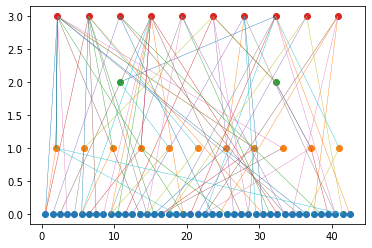

In [10]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [11]:
test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
test_y = digits.target[1617:]

In [12]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = test_y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = test_X[digits_indexes].shape[0]
test_x_inputs =[tuple(c) for c in test_X[digits_indexes].tolist()]
test_x_outputs = [tuple(c) for c in test_y[digits_indexes].reshape(samplesize,1).tolist()]

In [13]:
outputs = []
for xi in test_x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)


px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
# the index of maximum in each line
test_pred_outputs = np.argmax(px_outputs, axis = 1)
# replace index to real number, from higher number to lower number!!
for i in range(number_of_classification):
    index = number_of_classification - i - 1
    test_pred_outputs[test_pred_outputs==index] = numbers[index]

test_real_outputs = np.array(test_x_outputs).reshape(samplesize,)

In [14]:
test_real_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9])

In [15]:
test_pred_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 6, 3, 3, 3,
       3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 5, 6, 0, 3, 6, 3,
       3, 6, 4, 3, 4, 4, 4, 4, 4, 7, 4, 6, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 0, 5, 5, 5, 0, 6, 3,
       6, 4, 4, 6, 6, 6, 6, 6, 0, 6, 6, 6, 4, 6, 4, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 4, 4, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 6, 6,
       3, 4, 3, 4, 4, 3, 4, 6, 4, 3, 3, 4, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3], dtype=int64)

In [16]:
np.sum(test_pred_outputs == test_real_outputs)/samplesize

0.4888888888888889

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_pred_outputs, test_real_outputs)
print(cm)

[[16  0  0  1  1  2  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  7 15 11  0  0  1  0  3 15]
 [ 0 12  0  2 17  1  4  2 11  2]
 [ 0  0  0  1  0 15  0  0  0  1]
 [ 0  0  2  3  1  0 12  0  3  0]
 [ 0  0  0  0  1  0  0 17  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]


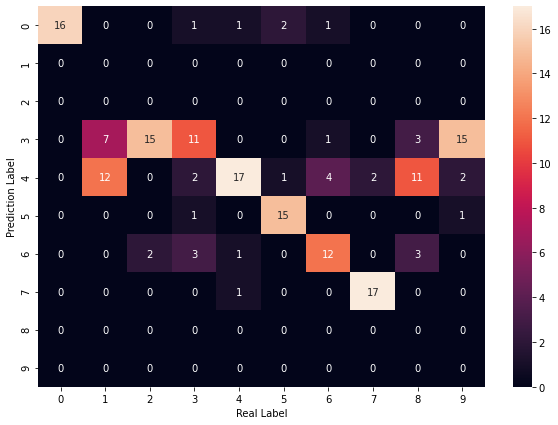

In [18]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [20]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [21]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [43, 11, 2, 10]


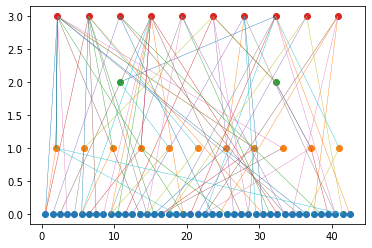

In [22]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [23]:
stats

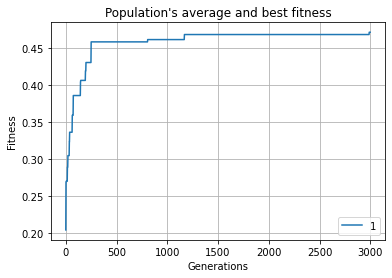

In [24]:

statistics = stats

generation = range(len(statistics.most_fit_genomes))
best_fitness = [c.fitness for c in statistics.most_fit_genomes]
avg_fitness = np.array(statistics.get_fitness_mean())
stdev_fitness = np.array(statistics.get_fitness_stdev())



#plt.plot(generation, avg_fitness, "b-", label="average")
#plt.plot(generation, avg_fitness - stdev_fitness, "g-.", label="-1 sd")
#plt.plot(generation, avg_fitness + stdev_fitness, "g-.", label="+1 sd")

plt.plot(generation, best_fitness, label=i)

plt.title("Population's average and best fitness")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.grid()
plt.legend(loc="best")
plt.show()

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(10)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []


used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)


# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1
list_nodes_number.append(np.sum(length_of_each_layer))
list_connection_number.append(len(all_path_side2side))
total_nodes = np.sum(list_nodes_number)
total_connections = np.sum(list_connection_number)
print("Total nodes:{} Total connections::{}".format(total_nodes, total_connections))


length of each layers: [43, 11, 2, 10]
Total nodes:66 Total connections::82
